# Ensemble - Random Forest (Bagging)
1. Bagging - Creating 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset


In [2]:
import pandas as pd

df = pd.read_csv('train_titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2 : Basic data quality checks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y (Survived)


1. Drop Passanger Id , Name and ticket number these are statistically insignificant
2. Drop cabin column  because it has too many missing values

In [7]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

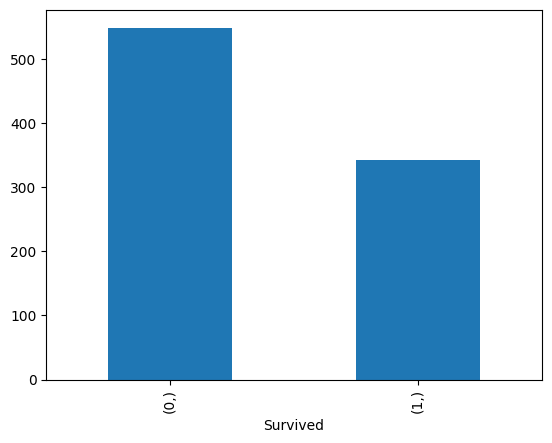

In [11]:
Y.value_counts().plot(kind='bar')

### Step4 : Perform preprocessing on X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median'),
                            ('scaler', StandardScaler()))])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), 
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)])

In [19]:
import sklearn
sklearn.__version__

'1.4.2'

In [20]:
X_pre = pre.fit_transform(X)

ValueError: too many values to unpack (expected 2)